In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [39]:
df = pd.read_csv('Salary_Data.csv')

In [41]:
df.head(5)

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891


In [42]:
df.tail(5)

,YearsExperience,Age,Salary
25,9.0,34.0,105582
26,9.5,35.0,116969
27,9.6,36.0,112635
28,10.3,37.0,122391
29,10.5,38.0,121872


In [43]:
df.sample(5)

,YearsExperience,Age,Salary
22,7.9,31.0,101302
23,8.2,32.0,113812
2,1.5,21.7,37731
7,3.2,23.3,54445
5,2.9,23.0,56642


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Age              30 non-null     float64
 2   Salary           30 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [45]:
df.describe()

,YearsExperience,Age,Salary
count,30.000000,30.000000,30.000000
mean,5.313333,27.216667,76003.000000
std,2.837888,5.161267,27414.429785
min,1.100000,21.000000,37731.000000
25%,3.200000,23.300000,56720.750000
50%,4.700000,25.000000,65237.000000
75%,7.700000,30.750000,100544.750000
max,10.500000,38.000000,122391.000000


In [46]:
df.shape

(30, 3)

In [47]:
df.dtypes

YearsExperience    float64
Age                float64
Salary               int64
dtype: object

In [48]:
df.isnull().sum()

YearsExperience    0
Age                0
Salary             0
dtype: int64

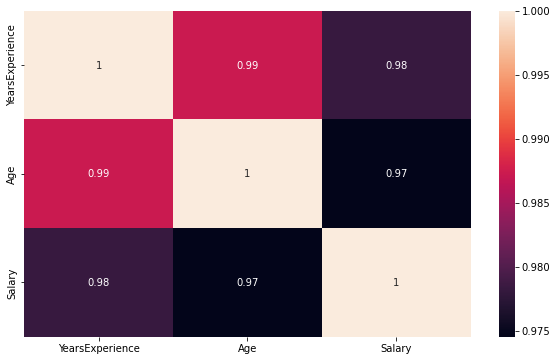

In [50]:
cor = df.corr()
plt.figure(figsize = (10, 6))
sns.heatmap(cor, annot = True)
plt.show()

In [51]:
X = df.iloc[:, 0:2].values
y = df.iloc[:, 2].values

In [54]:
import statsmodels.api as sm
X = sm.add_constant(X)

In [55]:
X

array([[ 1. ,  1.1, 21. ],
       [ 1. ,  1.3, 21.5],
       [ 1. ,  1.5, 21.7],
       [ 1. ,  2. , 22. ],
       [ 1. ,  2.2, 22.2],
       [ 1. ,  2.9, 23. ],
       [ 1. ,  3. , 23. ],
       [ 1. ,  3.2, 23.3],
       [ 1. ,  3.2, 23.3],
       [ 1. ,  3.7, 23.6],
       [ 1. ,  3.9, 23.9],
       [ 1. ,  4. , 24. ],
       [ 1. ,  4. , 24. ],
       [ 1. ,  4.1, 24. ],
       [ 1. ,  4.5, 25. ],
       [ 1. ,  4.9, 25. ],
       [ 1. ,  5.1, 26. ],
       [ 1. ,  5.3, 27. ],
       [ 1. ,  5.9, 28. ],
       [ 1. ,  6. , 29. ],
       [ 1. ,  6.8, 30. ],
       [ 1. ,  7.1, 30. ],
       [ 1. ,  7.9, 31. ],
       [ 1. ,  8.2, 32. ],
       [ 1. ,  8.7, 33. ],
       [ 1. ,  9. , 34. ],
       [ 1. ,  9.5, 35. ],
       [ 1. ,  9.6, 36. ],
       [ 1. , 10.3, 37. ],
       [ 1. , 10.5, 38. ]])

In [56]:
model = sm.OLS(y, X).fit()

In [57]:
model

In [58]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     323.9
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           1.35e-19
Time:                        01:09:02   Log-Likelihood:                -300.35
No. Observations:                  30   AIC:                             606.7
Df Residuals:                      27   BIC:                             610.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6661.9872   2.28e+04     -0.292      0.773   -5.35e+04    4.02e+04
x1          6153.3533   2337.092      2.633      0.014    1358.037    1.09e+04
x2          1836.0136   1285.034      1.429      0.165    -800.659    4472.686
==============================================================================
Omnibus:                        2.695   Durbin-Watson:                   1.711
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.975
Skew:                           0.456   Prob(JB):                        0.372
Kurtosis:                       2.135   Cond. No.                         626.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
X = df.iloc[:, 1:3].values

In [60]:
import scipy.stats as stats
stats.zscore(y)

array([-1.36011263, -1.10552744, -1.419919  , -1.20495739, -1.33978143,
       -0.71830716, -0.58815781, -0.79981746, -0.42881019, -0.69801306,
       -0.47433279, -0.74976858, -0.70662043, -0.70201994, -0.55250402,
       -0.29921736, -0.37004264,  0.26285865,  0.19885989,  0.66547573,
        0.58377993,  0.82623317,  0.93861127,  1.40274136,  1.24020308,
        1.09740238,  1.51986835,  1.3590738 ,  1.72102849,  1.70177321])

In [61]:
stats.zscore(X)

array([[-1.22507556, -1.36011263],
       [-1.12654401, -1.10552744],
       [-1.08713139, -1.419919  ],
       [-1.02801246, -1.20495739],
       [-0.98859985, -1.33978143],
       [-0.83094937, -0.71830716],
       [-0.83094937, -0.58815781],
       [-0.77183044, -0.79981746],
       [-0.77183044, -0.42881019],
       [-0.71271152, -0.69801306],
       [-0.65359259, -0.47433279],
       [-0.63388628, -0.74976858],
       [-0.63388628, -0.70662043],
       [-0.63388628, -0.70201994],
       [-0.43682319, -0.55250402],
       [-0.43682319, -0.29921736],
       [-0.2397601 , -0.37004264],
       [-0.042697  ,  0.26285865],
       [ 0.15436609,  0.19885989],
       [ 0.35142918,  0.66547573],
       [ 0.54849227,  0.58377993],
       [ 0.54849227,  0.82623317],
       [ 0.74555537,  0.93861127],
       [ 0.94261846,  1.40274136],
       [ 1.13968155,  1.24020308],
       [ 1.33674464,  1.09740238],
       [ 1.53380773,  1.51986835],
       [ 1.73087083,  1.3590738 ],
       [ 1.92793392,

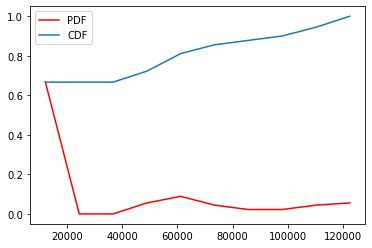

In [62]:
count, bins_count = np.histogram(df, bins=10)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()
plt.show()

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [64]:
X

array([[-1.22507556, -1.36011263],
       [-1.12654401, -1.10552744],
       [-1.08713139, -1.419919  ],
       [-1.02801246, -1.20495739],
       [-0.98859985, -1.33978143],
       [-0.83094937, -0.71830716],
       [-0.83094937, -0.58815781],
       [-0.77183044, -0.79981746],
       [-0.77183044, -0.42881019],
       [-0.71271152, -0.69801306],
       [-0.65359259, -0.47433279],
       [-0.63388628, -0.74976858],
       [-0.63388628, -0.70662043],
       [-0.63388628, -0.70201994],
       [-0.43682319, -0.55250402],
       [-0.43682319, -0.29921736],
       [-0.2397601 , -0.37004264],
       [-0.042697  ,  0.26285865],
       [ 0.15436609,  0.19885989],
       [ 0.35142918,  0.66547573],
       [ 0.54849227,  0.58377993],
       [ 0.54849227,  0.82623317],
       [ 0.74555537,  0.93861127],
       [ 0.94261846,  1.40274136],
       [ 1.13968155,  1.24020308],
       [ 1.33674464,  1.09740238],
       [ 1.53380773,  1.51986835],
       [ 1.73087083,  1.3590738 ],
       [ 1.92793392,

In [65]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.20, random_state = 0)

In [66]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X, y)

LinearRegression()

In [67]:
y_pred = linear.predict(X_test)

In [68]:
y_pred

array([ 37731., 122391.,  57081.,  63218., 116969., 109431.])

In [81]:
Theta_0 = linear.coef_[0]
Theta_1 = linear.coef_[1]
print(Theta_0)
print(Theta_1)

-5.313608150319643e-12
26953.650248775844


In [75]:
linear.intercept_

76003.0

In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from math import sqrt
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(mse)

In [77]:
print('MSE: ', mse)
print('MAE: ', mae)
print('RMSE: ', rmse)

MSE:  1.9411171707911049e-22
MAE:  9.701276818911234e-12
RMSE:  1.3932398109410687e-11


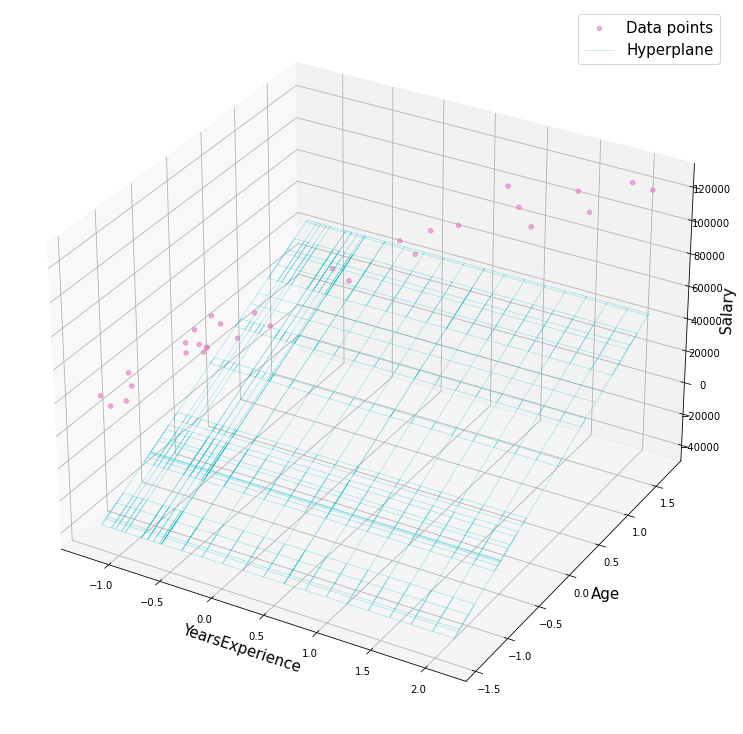

In [78]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,10))
ax = Axes3D(fig)
ax.scatter(X[:,0], X[:,1], y, c='C6', marker='o', alpha=0.6) 
x0, x1 = np.meshgrid(X[:,0], X[:,1])
yp = Theta_0 * x0 + Theta_1 * x1
ax.plot_wireframe(x0, x1, yp, linewidth = 0.5,color='C9', alpha=0.5)
ax.legend(fontsize=15, labels = ['Data points', 'Hyperplane'])
ax.set_xlabel('YearsExperience', fontsize = 15)
ax.set_ylabel('Age', fontsize = 15)
ax.set_zlabel('Salary', fontsize = 15)
plt.show()

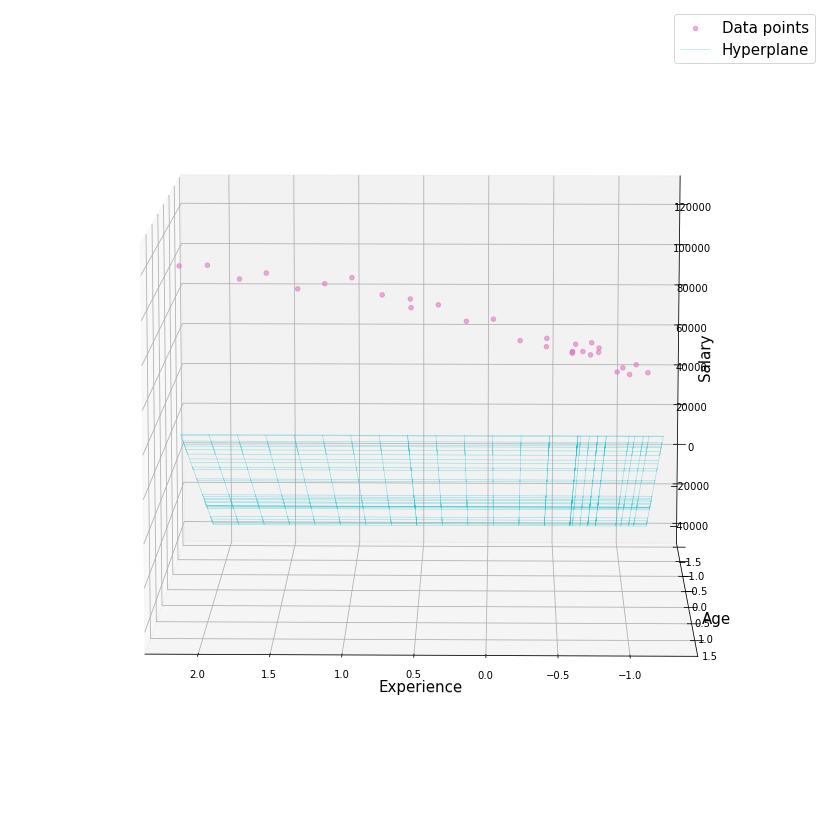

In [80]:
def plot_view(elev_given, azim_given):
    fig = plt.figure(figsize = (30, 15))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:,0], X[:,1], y, c='C6', marker='o', alpha=0.6, label='Data points')
    x0, x1 = np.meshgrid(X[:,0], X[:,1])
    yp = Theta_0 * x0 + Theta_1 * x1
    ax.plot_wireframe(x0 ,x1 ,yp , rcount=200,ccount=200, linewidth = 0.5, color='C9', alpha=0.5, label='Hyperplane')
    ax.set_xlabel('Experience', fontsize = 15)
    ax.set_ylabel('Age', fontsize = 15)
    ax.set_zlabel('Salary', fontsize = 15)
    plt.legend(fontsize=15)
    ax.view_init(elev=elev_given, azim=azim_given)
plot_view(10,91)
plt.show()